# MULTICLASS CLASSIFICATION
Dataset taken from https://archive.ics.uci.edu/ml/datasets/Abalone
Code referred from Hands-On Machine Learning With - Aurelien Geron_1620 book

In [ ]:
#importing all the necessary libraries like numpy and pandas
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [4]:
#Reading input from a excel file to a dataframe
dfaba=pd.read_excel('D:/knowledge/college docs/DSP/Datasets/Abalone_dataset.xlsx')

# Data Visualization

In [6]:
#returns n rows, by default returns 5 rows 
dfaba.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,A
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,C
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,T
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,T
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,C


In [7]:
dfaba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole_weight      4177 non-null float64
Shucked_weight    4177 non-null float64
Viscera_weight    4177 non-null float64
Shell_weight      4177 non-null float64
Rings             4177 non-null int64
Age               4177 non-null object
dtypes: float64(7), int64(1), object(2)
memory usage: 326.4+ KB


In [8]:
#Checking attributes mean, max,etc
dfaba.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


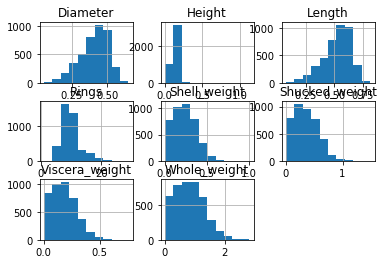

In [12]:
#plot histogram for all attributes
dfaba.hist()
plt.show()

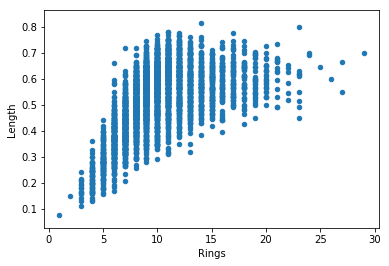

In [14]:
#A scatterplot to demonstrate how length of abalone increases as it grows
dfaba.plot(kind='scatter', x="Rings", y='Length')
plt.show()

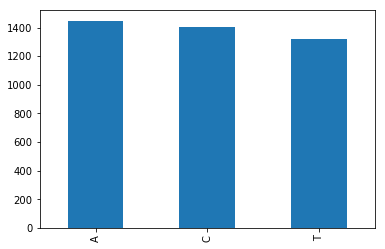

In [19]:
#Frequency distribution of the target variable
dfaba['Age'].value_counts().plot(kind='bar')
plt.show()

In [21]:
#Checking correlation matrix to avoid multicollinearity
dfaba.drop(['Sex','Age'],axis=1).corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap(), axis=1)

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Length,1.0,0.99,0.83,0.93,0.9,0.9,0.9,0.56
Diameter,0.99,1.0,0.83,0.93,0.89,0.9,0.91,0.57
Height,0.83,0.83,1.0,0.82,0.77,0.8,0.82,0.56
Whole_weight,0.93,0.93,0.82,1.0,0.97,0.97,0.96,0.54
Shucked_weight,0.9,0.89,0.77,0.97,1.0,0.93,0.88,0.42
Viscera_weight,0.9,0.9,0.8,0.97,0.93,1.0,0.91,0.5
Shell_weight,0.9,0.91,0.82,0.96,0.88,0.91,1.0,0.63
Rings,0.56,0.57,0.56,0.54,0.42,0.5,0.63,1.0


# Feature selection

In [ ]:
# Based on above correlation matrix selecting the features
#feature_cols = ['Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight']
feature_cols = ['Length','Height','Whole_weight','Shell_weight','Shucked_weight','Viscera_weight']
dfABA_X = dfaba[feature_cols]

In [235]:
dfABA_Y = dfaba['Age']

# MULTICLASS MODELS

In [236]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [237]:
#Splitting data into train and test
x_train, x_test, y_train, y_test = train_test_split(dfABA_X, dfABA_Y, test_size=0.15, random_state=42)

# Decision Tree

In [238]:
tree_model=tree.DecisionTreeClassifier(max_depth=4)
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [239]:
dt_aba_pred=tree_model.predict(x_test)

In [240]:
print(accuracy_score(y_test,dt_aba_pred))

0.602870813397


In [241]:
print(confusion_matrix(y_test,dt_aba_pred))
print(classification_report(y_test,dt_aba_pred))

[[137   8  58]
 [ 12 137  67]
 [ 72  32 104]]
             precision    recall  f1-score   support

          A       0.62      0.67      0.65       203
          C       0.77      0.63      0.70       216
          T       0.45      0.50      0.48       208

avg / total       0.62      0.60      0.61       627



# SGD Model

In [242]:
from sklearn.linear_model import SGDClassifier

In [243]:
sgd_clf = SGDClassifier(random_state=42,n_iter=10)
sgd_clf.fit(x_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=10, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [244]:
sgd_aba_pred=sgd_clf.predict(x_test)

In [245]:
print(accuracy_score(y_test,sgd_aba_pred))

0.58692185008


In [246]:
print(confusion_matrix(y_test,sgd_aba_pred))
print(classification_report(y_test,sgd_aba_pred))

[[113   3  87]
 [  4  92 120]
 [ 32  13 163]]
             precision    recall  f1-score   support

          A       0.76      0.56      0.64       203
          C       0.85      0.43      0.57       216
          T       0.44      0.78      0.56       208

avg / total       0.69      0.59      0.59       627



In [247]:
cross_val_score(sgd_clf, x_train, y_train, cv=10, scoring="accuracy")

array([ 0.58263305,  0.54494382,  0.58707865,  0.57303371,  0.6       ,
        0.60451977,  0.5819209 ,  0.55649718,  0.55084746,  0.54519774])

Accuracy decreases on using Linear model like SGD, since this is Multiclass variable, hence opting to train the model One on One with different values of the Target variable

# One VS One classifier

In [248]:
from sklearn.multiclass import OneVsOneClassifier

In [249]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42,n_iter=20))
ovo_clf.fit(x_train,y_train)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=20, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False),
          n_jobs=1)

In [250]:
ovo_aba_pred=ovo_clf.predict(x_test)

In [251]:
print(accuracy_score(y_test,ovo_aba_pred))

0.6331738437


In [252]:
print(confusion_matrix(y_test,ovo_aba_pred))
print(classification_report(y_test,ovo_aba_pred))

[[161  12  30]
 [ 14 157  45]
 [ 83  46  79]]
             precision    recall  f1-score   support

          A       0.62      0.79      0.70       203
          C       0.73      0.73      0.73       216
          T       0.51      0.38      0.44       208

avg / total       0.62      0.63      0.62       627



The accuracy increases on using OvO technique for a linear classifier like SGD

In [253]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [254]:
# the accuracy of the model lingers around 60% on using cross validation
cross_val_score(ovo_clf, x_train, y_train, cv=10, scoring="accuracy")

array([ 0.60784314,  0.60955056,  0.60674157,  0.59550562,  0.56338028,
        0.60734463,  0.5960452 ,  0.59039548,  0.67231638,  0.61299435])

# One VS Rest Classifiers

In [280]:
from sklearn.multiclass import OneVsRestClassifier

In [281]:
ovr_clf = OneVsRestClassifier(SGDClassifier(random_state=42,n_iter=20))
ovr_clf.fit(x_train,y_train)

OneVsRestClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=20, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False),
          n_jobs=1)

In [282]:
ovr_aba_pred=ovr_clf.predict(x_test)

In [283]:
print(accuracy_score(y_test,ovr_aba_pred))

0.593301435407


In [284]:
print(confusion_matrix(y_test,ovr_aba_pred))
print(classification_report(y_test,ovr_aba_pred))

[[186  14   3]
 [ 40 168   8]
 [137  53  18]]
             precision    recall  f1-score   support

          A       0.51      0.92      0.66       203
          C       0.71      0.78      0.75       216
          T       0.62      0.09      0.15       208

avg / total       0.62      0.59      0.52       627



Accuracy for OvR decreases as compared to OvO

# Neural Network for Multiclass

In [255]:
from sklearn.neural_network import MLPClassifier

In [256]:
nn_clf = MLPClassifier(random_state=42,max_iter=500)

In [257]:
nn_clf.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [258]:
nn_aba_pred=nn_clf.predict(x_test)

In [259]:
print(accuracy_score(y_test,nn_aba_pred))

0.645933014354


In [285]:
print(confusion_matrix(y_test,nn_aba_pred))
print(classification_report(y_test,nn_aba_pred))

[[146  13  44]
 [  5 167  44]
 [ 59  57  92]]
             precision    recall  f1-score   support

          A       0.70      0.72      0.71       203
          C       0.70      0.77      0.74       216
          T       0.51      0.44      0.47       208

avg / total       0.64      0.65      0.64       627



# The above model performs the best till now, it provides good precision and recall for Age category A and C, but suffers a bit to predict Age category T

# Neural Net Hyperparamets Tuning

In [260]:
from  sklearn.model_selection import RandomizedSearchCV #Using radomized search for hyperparmeter search

In [272]:
parameters={
'learning_rate': ["constant", "invscaling", "adaptive"],
'hidden_layer_sizes': [(100),(200),(300),(400)],
'momentum': [0.9,0.5,0.3],
'max_iter':[500,750,1000]
}

In [273]:
NN_tunning = RandomizedSearchCV(nn_clf,parameters,n_iter=10,cv=5) 
#Cv is cross validation generator
#parameters is choosing distinct parameters

In [274]:
NN_tunning.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'learning_rate': ['constant', 'invscaling', 'adaptive'], 'hidden_layer_sizes': [100, 200, 300, 400], 'momentum': [0.9, 0.5, 0.3], 'max_iter': [500, 750, 1000]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [275]:
y_pred = NN_tunning.predict(x_test) #predicting on testing data

In [276]:
cm = confusion_matrix(y_test,y_pred)#creating the confusion matrix
cm

array([[135,  13,  55],
       [  4, 169,  43],
       [ 48,  58, 102]])

In [277]:
accuracy_score(y_test,y_pred)  #Checking the accuracy of our model

0.6475279106858054

In [278]:
print(classification_report(y_test,y_pred)) #Printing the classification report

             precision    recall  f1-score   support

          A       0.72      0.67      0.69       203
          C       0.70      0.78      0.74       216
          T       0.51      0.49      0.50       208

avg / total       0.65      0.65      0.65       627



In [279]:
print("Tuned Decision Tree Parameters: {}".format(NN_tunning.best_params_))
#Printing out the parameters of the current search

Tuned Decision Tree Parameters: {'momentum': 0.3, 'max_iter': 750, 'learning_rate': 'invscaling', 'hidden_layer_sizes': 300}


# On tuning the Nueral network the accuracy doesn't differ much as compared to the one before.
# It can be concluded that for Multiclass data Neural network performs better as compared to Linear models in our case.